# datasets and dataloder

Dataset 是用来存储样本和样本对应的标签数据
DataLoader 是用来将Dataset的数据打包成一个迭代器，这样可以方便使用

需要使用的库：
- torch.utils.data.Dataloader
- torch.utils.data.Dataset

pytorch 里面预存了很多相关的数据

### 加载预存数据样本 FashionMNIST 

这是一个类似与MNIST数据样本的格式，
- 60000个训练样本，
- 10000个测试样本，
- 单个样本大小为28*28 灰度图像
- 10个类别

函数的详情：[FashionMNIST](https://pytorch.org/vision/stable/datasets.html#fashion-mnist)
- root : 数据存放的路径
- train： 该数据是测试数据还是训练数据
- download：是否需要下载
- transform：是否需要调用各种转换函数：transforms.RandomCrop
- target_transform：是否需要对标签进行转换




In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# 加载训练数据
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# 加载测试数据
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


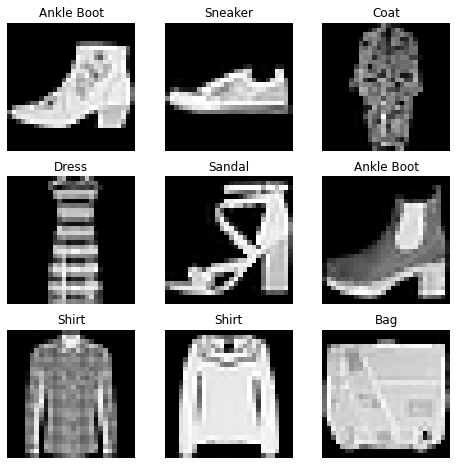

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# 绘制图片的基本的用法 figure
# torch 转换成普通python数据类型
# squeeze()的使用
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    # 单个tensor元素可以转换成python的数据格式
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    img, label = training_data[sample_idx]
    print(img.shape)
    # 使用figure绘制图片
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show() 


### transform
上述的datsets函数中有一个比较特别的参数，就是transform，其主要的作用：
- 转换数据格式：将原始的数据转换成可以用来训练的的数据格式

在torchvision中会有这样两个转换参数：
- transform: 用来转换输入的有参数
- traget_transform:用来转换标签的参数



In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    # ToTensor() 这里是将PIL或者Numpy转换成FloatTensor格式
    transform=ToTensor(),
    # 使用Lambda来实现onehot转换
    target_transform=Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value=1))
)


In [3]:
# test lambda
# 这里就是将输入的lable标签转换成onehot形式，比如
# 9 => [0,0,0,0,0,0,0,0,0,1]
target_transform = Lambda(lambda y: torch.zeros(
    10,dtype=torch.float).scatter_(dim=0,index=torch.tensor(y),value=1)
)

print(target_transform)

Lambda()
